# Ant Colony Optimization

# Documentation

## tsp module

`cost(solution, distance_matrix, round_trip)`: returns the cost of a solution.

- *solution (np.ndarray):* list of cities indexes in the order they are visited.

- *distance_matrix (np.ndarray):* distance matrix between all cities.

- *round_trip (bool):* if True, the solution is a round trip. Default: True.

`read_tsp_file(file_name)`: reads data from a file and returns a pandas DataFrame.

- *file_name (str):* file name to read

`distance(city1, city2)`: returns the distance between two cities.

- *city1 (tuple[int, int]):* first city coordinates.

- *city2 (tuple[int, int]):* second city coordinates.
  
`distance_matrix(df)`: returns the distance matrix between all cities.

- *df (pandas.DataFrame):* DataFrame containing the cities coordinates.

`plot_solution_path(df, solution, figsize, path_alpha)`: plots the solution path.

- *df (pandas.DataFrame):* DataFrame containing the cities coordinates.

- *solution (list[int]):* list of cities indexes in the order they are visited.

- *figsize (tuple[int, int]):* figure size. Default: (10, 10).

- *path_alpha (float):* path transparency. Default: 0.5.


## ant_system module

`AntSystem(distance_matrix, alpha, beta, evaporation_rate, n_ants, round_trip, rng)`: Ant System implementation.

- *distance_matrix (np.ndarray):* distance matrix between all cities.

- *alpha (float):* pheromone influence ($\alpha \geq 0$).

- *beta (float):* distance influence ($\beta \geq 0$).

- *evaporation_rate (float):* pheromone evaporation rate ($0 \leq \rho \leq 1$).

- *n_ants (int):* number of ants ($n \geq 1$).

- *round_trip (bool):* if True, the solution is a round trip.

- *rng (np.random.Generator):* random number generator.


`AntSystem.initialization()`: initializes the tabu list. Each ant starts from a random city.

`AntSystem.next_city(ant, current_city_index)`: returns the next city to visit.

- *ant (int):* ant number.

- *current_city_index (int):* current city index of the tabu list.

- *Returns (int):* next city index.

`AntSystem.cycle()`: runs a cycle of the algorithm.

`AntSystem.cycle_best_solutions(n)`: returns the $n$ best solutions of the cycle.

- *n (int):* number of best solutions to return.

- *Returns (np.ndarray):* n array of shape (n, n_cities) containing the $n$ best solutions.


`AntSystem.evaporation()`: evaporates the pheromones.

`AntSystem.reinforcement()`: reinforce the pheromones.

`AntSystem.run(max_cycles, verbose)`: runs the algorithm.

- *max_cycles (int):* maximum number of cycles.

- *verbose (bool):* if True, prints the best solution and its cost at each cycle. Default: False.

- *Returns (np.ndarray):* best solution found.

# The $k$-nearest Ant System 

This approach aims to enhance the efficiency of the next city selection process by focusing solely on the $k$-nearest cities in proximity to the current city. Instead of selecting the next city randomly from the entire set of unvisited cities, it is chosen from the subset consisting of the $k$-nearest cities to the current location.

## Explanation

Consider a specific city denoted as $i$, along with a set of unvisited cities denoted as $U_i$. In the standard approach, the time needed to decide the next city is influenced by the size of $U_i$, leading to notable delays when $\lvert U_i \rvert$ is significantly large. To address this, the concept of a set $N_i^k$ is introduced, representing the collection of the $k$ nearest cities to city $i$. As a result, the subsequent city is randomly chosen only from the intersection of $N_i^k$ and $U_i$. This optimized strategy offers a more efficient selection process, particularly as the available choices are narrowed down to the nearest neighbors of the current city.

The main consideration to take into account is when, for a given city $i$, the intersection of $N_i^k$ and $U_i$ is empty. In this case, the next city is chosen randomly from the set $U_i$, as in the standard approach. Remarkably, as $k$ decreases, the intersection $N_i^k \cap U_i$ becomes more likely to be empty. Therefore finding a suitable value for $k$ is not trivial, as it is necessary to balance the efficiency of the selection process with the probability of the intersection being empty.

## Experiments

### Libraries

In [2]:
import numpy as np
from src import tsp
from src import ant_system

### Dataset

The [QA194](https://www.math.uwaterloo.ca/tsp/world/qapoints.html) dataset is used for the experiments. It contains 194 cities of Qatar and the optimal solution is 9352. 

In [3]:
df = tsp.read_tsp_file("data/qa194.tsp")
df.describe()

,x,y
count,194.000000,194.000000
mean,25555.658645,51292.371134
std,330.297453,201.368050
min,24748.333300,50766.666700
25%,25283.888875,51159.236100
50%,25493.611100,51322.361150
75%,25855.000025,51457.430575
max,26150.277800,51619.166700


<Axes: xlabel='x', ylabel='y'>

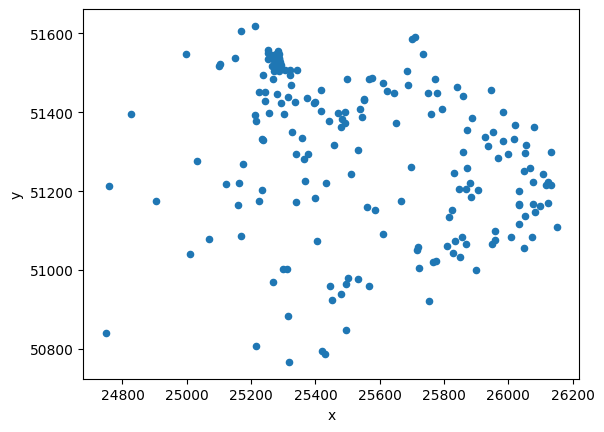

In [4]:
df.plot(x="x", y="y", kind="scatter")

The distance matrix for this dataset is

In [5]:
distance_matrix = tsp.distance_matrix(df)
distance_matrix, distance_matrix.shape

(array([[          inf,  372.09415123,  560.30364778, ..., 1435.30582208,
         1459.39199669, 1427.34094938],
        [ 372.09415123,           inf,  195.13370816, ..., 1374.45251239,
         1377.26221083, 1395.26196602],
        [ 560.30364778,  195.13370816,           inf, ..., 1318.19193087,
         1309.54133219, 1353.75546545],
        ...,
        [1435.30582208, 1374.45251239, 1318.19193087, ...,           inf,
           83.3333    ,  109.92491584],
        [1459.39199669, 1377.26221083, 1309.54133219, ...,   83.3333    ,
                   inf,  192.69086323],
        [1427.34094938, 1395.26196602, 1353.75546545, ...,  109.92491584,
          192.69086323,           inf]]),
 (194, 194))

### Parameters

Both implementation of the Ant System algorithms are tested for a total of $100$ ants, a  pheromone influence of $\alpha = 0.8$, a heuristic influence of $\beta = 5$ and a pheromone evaporation rate of $\rho = 0.5$. A round trip is considered, and the algorithm is run for $50$ iterations.

In [6]:
n_ants = 100
alpha = 0.8
beta=5
evaporation_rate=0.5
round_trip=True
max_cycles=50

The random number generator used is the NumPy implementation of the PCG64 algorithm with a seed of $42$.

In [7]:
rng = np.random.default_rng(42)

## Ant System performance

In [8]:
ant_sys = ant_system.AntSystem(
    distance_matrix,
    alpha,
    beta,
    evaporation_rate,
    n_ants,
    round_trip,
    rng
)

%time ant_sys.run(max_cycles, verbose=False)

CPU times: total: 2min 5s
Wall time: 2min 5s


array([ 61,  58,  35,  15,   7,   5,   0,  19,  64,  62,  84,  85,  97,
        93,  89,  88,  98, 100, 103, 110, 129, 155, 160, 162, 163, 168,
       171, 178, 185, 182, 186, 189, 193, 181, 175, 173, 172, 174, 176,
       180, 183, 188, 190, 191, 187, 192, 177, 179, 184, 170, 169, 166,
       167, 164, 158, 161, 157, 165, 159, 147, 142, 154, 150, 146, 151,
       152, 149, 153, 156, 143, 138, 137, 141, 145, 148, 144, 139, 136,
       133, 131, 126, 124, 125, 113, 112, 108, 118, 121, 117, 107, 106,
       104, 105, 109, 111, 114, 115, 116, 120, 119, 122, 123, 127, 132,
       134, 128, 130, 135, 140,  99,  83,  78,  80,  76,  69,  59,  56,
        44,  36,  38,  46,  50,  60,  57,  55,  51,  52,  47,  45,  40,
        37,  39,  42,  53,  54,  48,  43,  41,  34,  31,  29,  30,  33,
        26,  28,  21,  27,  32,  23,  25,  20,  17,  68,  73,  77,  74,
        71,  75,  79,  86, 101, 102,  90,  92,  95,  94,  96,  91,  87,
        82,  63,  67,  65,  66,  72,  49,  14,  18,  11,   9,   

In [9]:
ant_sys.best_solution_cost

10638.196916436973

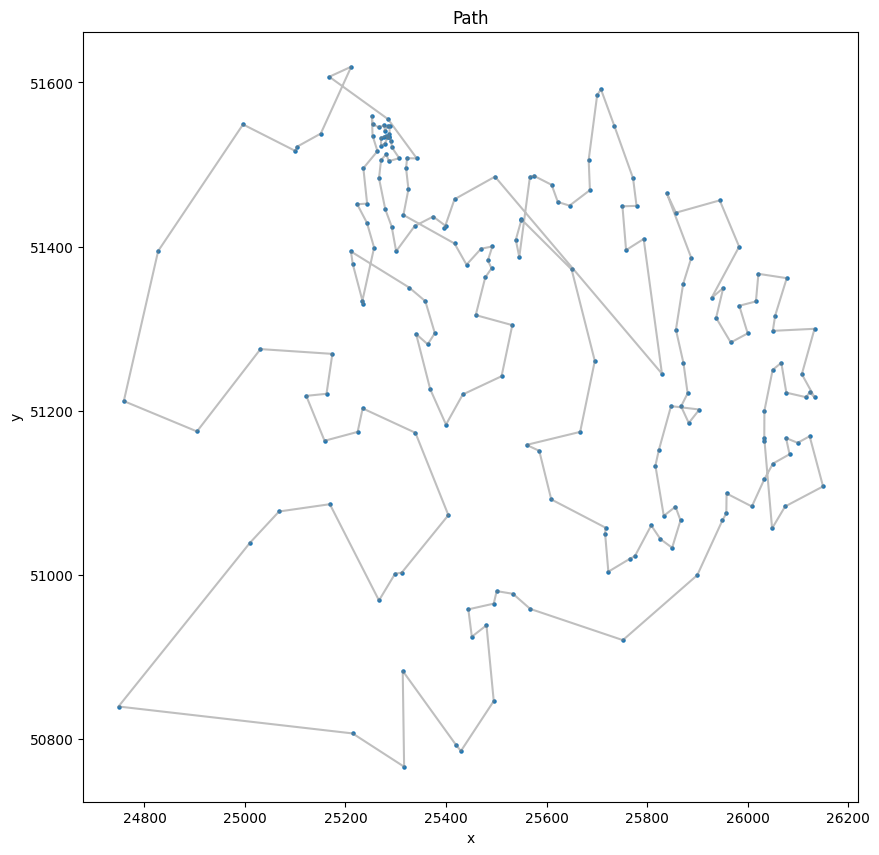

In [10]:
tsp.plot_solution_path(df, ant_sys.best_solution, city_size=5, path_alpha=0.5)

### $k$-Nearest Ant System 

#### $10$-Nearest Ant System

In [11]:
k_near_distance, k_near_cities = tsp.compress_distance(distance_matrix, k=10)
list(zip(k_near_cities[0], k_near_distance[0])) # The 10 nearest cities to the first city

[(6, 518.915227347245),
 (15, 487.4161494396466),
 (19, 466.9851611436954),
 (5, 329.00992474430154),
 (1, 372.0941512342277),
 (3, 369.5885219310938),
 (7, 398.05908930741793),
 (12, 522.325706856566),
 (10, 531.7154689607029),
 (35, 534.1849398330635)]

In [13]:
k10_ant_sys = ant_system.KNearestAntSystem(
    distance_matrix,
    k_near_distance,
    k_near_cities,
    alpha,
    beta,
    evaporation_rate,
    n_ants,
    round_trip,
    rng
)

%time k10_ant_sys.run(max_cycles, verbose=False)

CPU times: total: 1min 27s
Wall time: 1min 27s


array([ 75,  79,  86, 101, 102,  90,  92,  95,  94,  96,  91,  82,  80,
        78,  76,  69,  63,  44,  36,  38,  46,  50,  57,  55,  53,  52,
        51,  47,  45,  40,  37,  42,  39,  33,  30,  31,  29,  43,  41,
        49,  48,  54,  34,  18,  14,  11,   9,   8,   4,   2,   1,   0,
         3,   6,  13,  10,  12,  15,   7,   5,  22,  24,  16,  25,  23,
        17,  20,  32,  27,  28,  21,  26,  60,  66,  65,  72,  67,  56,
        59,  68,  73,  71,  74,  77,  87,  83,  99, 104, 105, 107, 106,
       109, 111, 114, 115, 116, 120, 119, 122, 123, 127, 132, 128, 134,
       135, 130, 117, 121, 118, 112, 108, 113, 124, 125, 126, 131, 133,
       139, 144, 148, 145, 141, 136, 137, 138, 149, 143, 140, 152, 156,
       153, 151, 146, 150, 154, 147, 142, 159, 161, 157, 158, 164, 167,
       177, 179, 169, 170, 165, 166, 180, 176, 174, 172, 173, 182, 185,
       186, 189, 188, 190, 191, 187, 192, 184, 183, 175, 181, 193, 178,
       171, 168, 162, 160, 163, 155, 129,  93,  98, 100, 103, 11

In [16]:
k10_ant_sys.best_solution_cost

10600.341938580686

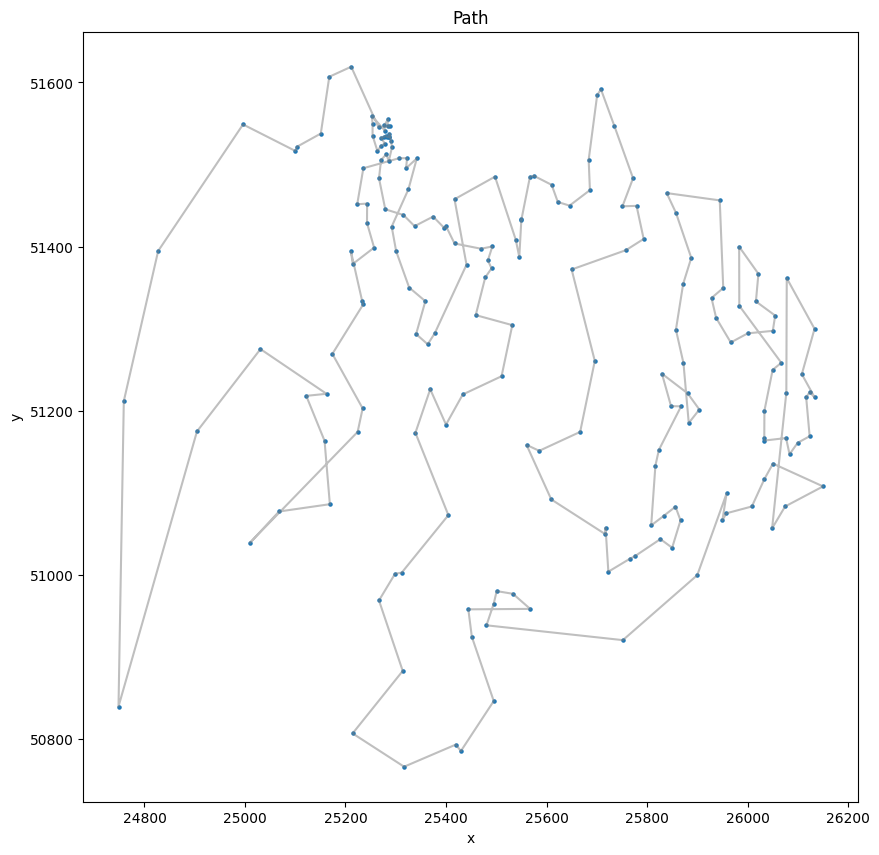

In [17]:
tsp.plot_solution_path(df, k10_ant_sys.best_solution, city_size=5, path_alpha=0.5)

#### $50$-Nearest Ant System

In [20]:
k_near_distance, k_near_cities = tsp.compress_distance(distance_matrix, k=50)

k50_ant_sys = ant_system.KNearestAntSystem(
    distance_matrix,
    k_near_distance,
    k_near_cities,
    alpha,
    beta,
    evaporation_rate,
    n_ants,
    round_trip,
    rng
)

%time k50_ant_sys.run(max_cycles, verbose=False)

CPU times: total: 3min 48s
Wall time: 3min 49s


array([125, 124, 126, 129, 155, 160, 162, 163, 168, 171, 178, 173, 172,
       174, 176, 180, 177, 179, 184, 192, 187, 190, 188, 191, 189, 186,
       185, 182, 181, 175, 193, 183, 156, 153, 121, 118, 112, 108, 113,
       117, 105, 104, 106, 107,  77,  74,  71,  73,  68,  59,  56,  63,
        69,  76,  80,  78,  82,  87,  91,  96,  94,  95,  92,  90, 102,
       101,  86,  75,  70,  79,  81,  88,  89,  93,  98, 100, 103, 110,
        97,  85,  84,  64,  19,  62,  35,  58,  61,  15,   7,   5,   0,
         3,   1,   2,   4,   8,   9,  11,  14,  18,  29,  31,  34,  41,
        43,  40,  45,  47,  52,  51,  53,  54,  48,  49,  55,  57,  46,
        50,  38,  33,  39,  37,  42,  30,  26,  28,  21,  27,  32,  17,
        20,  23,  25,  16,  13,  10,  12,  22,  24,   6,  44,  36,  67,
        60,  65,  66,  72,  83,  99, 109, 111, 114, 115, 116, 120, 119,
       122, 123, 127, 132, 134, 128, 130, 135, 142, 147, 159, 165, 170,
       169, 166, 167, 164, 158, 157, 161, 150, 154, 146, 151, 15